# Global Power Plant Database


## The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.



In [1]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


## Observations:-
Firstly, we explore the Global power plant dataset

### Features of dataset
- country:  character country code corresponding to the ISO 3166-1 alpha-3 specification.
- country_long: longer form of the country designation.
- name: name or title of the power plant, generally in Romanized form
- gppd_idnr: 10 or 12 character identifier for the power plant
- latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- other_fuel1: energy source used in electricity generation or export 
- other_fuel2: energy source used in electricity generation or export
- other_fuel3: energy source used in electricity generation or export
- commissioning_year: year of plant operation, weighted by unit-capacity when data is available
- owner: majority shareholder of the power plant, generally in Romanized form
- source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url (text): web document corresponding to the `source` field
- geolocation_source (text): attribution for geolocation information
- wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data (number): year the capacity information was reported
- generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
- generation_data_source (text): attribution for the reported generation information
- estimated_generation_gwh (number): estimated electricity generation in gigawatt-hours

### Label
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [5]:
df.shape

(907, 27)

### we have 907 rows and 27 columns

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
# let's check null values
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

### Most of the columns are having null values to handle this problem we will use imputing techniques

In [8]:
# let's drop the unnecessary columns from dataset
df.drop(columns=['estimated_generation_gwh','generation_gwh_2019'],axis=1,inplace=True)
df.drop(columns=['generation_gwh_2013','other_fuel3','other_fuel2'],axis=1,inplace=True)
df.drop(columns=['wepp_id','other_fuel1'],inplace=True)

In [9]:
df.shape

(907, 20)

### Now, we have 907 rows and 20 columns

In [10]:
##Checking Data type of features and label
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   commissioning_year      527 non-null    float64
 9   owner                   342 non-null    object 
 10  source                  907 non-null    object 
 11  url                     907 non-null    object 
 12  geolocation_source      888 non-null    object 
 13  year_of_capacity_data   519 non-null    float64
 14  generation_gwh_2014     398 non-null    fl

### country,country_long,name,gppd_idnr,generation_data_source,owner,source,url,geolocation_source,primary_fuel features are having object type values .we will use encoding techniques to handles this situation.

In [11]:
# let's check the unique values
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

### country,country_long,year_of_capacity_data,generation_data_source are having single unique value , there is no use of these columns

In [12]:
df.drop(columns=['country','country_long','year_of_capacity_data','generation_data_source'],inplace= True)
df.drop(columns=['url'],inplace=True)

In [13]:
df.shape

(907, 15)

In [14]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [15]:
# let's check the duplicate rows present or not in this dataset
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, commissioning_year, owner, source, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018]
Index: []


### There is no duplicates present in this dataset


In [16]:
df.drop(columns=['gppd_idnr'],inplace = True)
df.drop(columns=['owner'],inplace = True)

# EDA

In [17]:
for column in df.columns:
    if df[column].dtype== object:
        print(str(column))

name
primary_fuel
source
geolocation_source


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

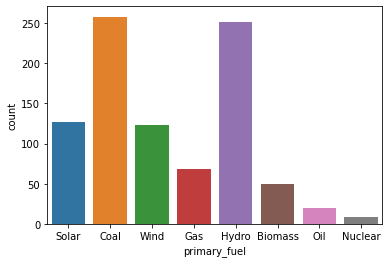

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='primary_fuel',data= df)

In [19]:
print(df['primary_fuel'].value_counts())

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


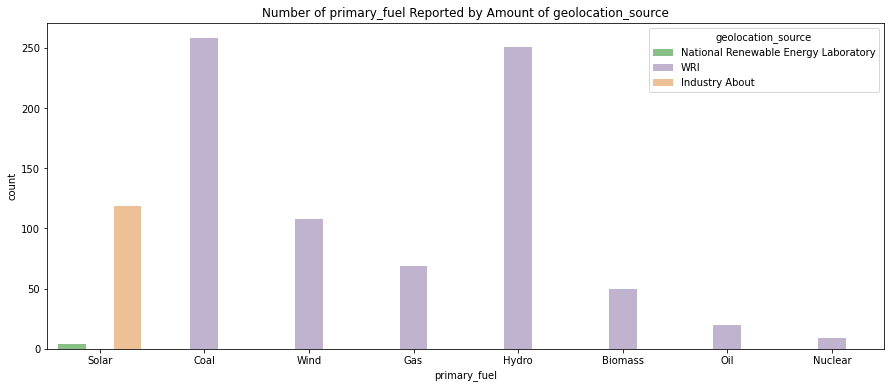

In [20]:
#let's visualize the relationship between primary_fuel and geolocation_source
plt.figure(figsize=(15,6))
sns.countplot(x=df['primary_fuel'],hue='geolocation_source',data=df, palette = 'Accent').set_title("Number of primary_fuel Reported by Amount of geolocation_source")
plt.show()

In [21]:
df.groupby('primary_fuel')['geolocation_source'].value_counts()


primary_fuel  geolocation_source                  
Biomass       WRI                                      50
Coal          WRI                                     258
Gas           WRI                                      69
Hydro         WRI                                     251
Nuclear       WRI                                       9
Oil           WRI                                      20
Solar         Industry About                          119
              National Renewable Energy Laboratory      4
Wind          WRI                                     108
Name: geolocation_source, dtype: int64

In [22]:
for column in df.columns:
    if df[column].dtype != object:
        print(str(column))

capacity_mw
latitude
longitude
commissioning_year
generation_gwh_2014
generation_gwh_2015
generation_gwh_2016
generation_gwh_2017
generation_gwh_2018


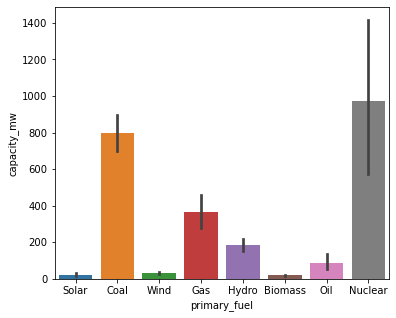

In [23]:
# let's visualize the relationship between capacity_mw and primary_fuel
plt.figure(figsize = (6,5))
sns.barplot(y='capacity_mw',x = 'primary_fuel',data = df)
plt.show()


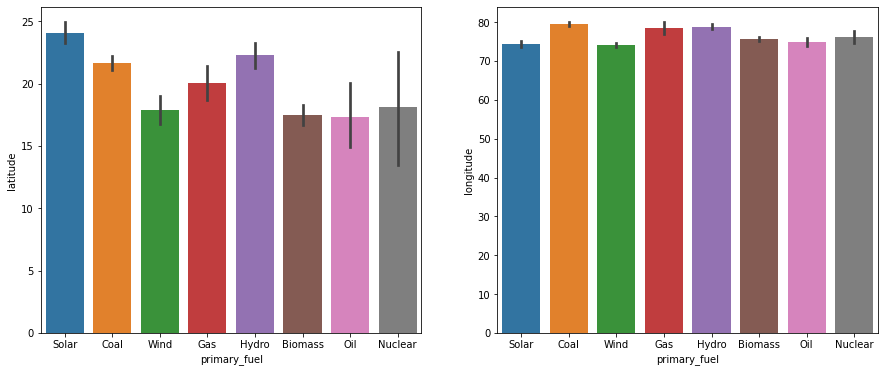

In [24]:
# let's visualize the longitude and latitude with primary_fuel
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(y='latitude',x = 'primary_fuel',data = df)
plt.subplot(1,2,2)
sns.barplot(y='longitude',x = 'primary_fuel',data = df)
plt.show()


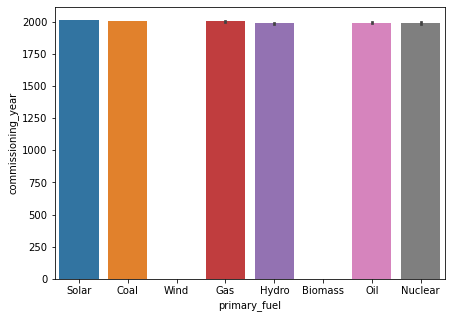

In [25]:
# let's visualize the relationship between commissioning_year and primary_fuel
plt.figure(figsize = (7,5))
sns.barplot(y='commissioning_year',x = 'primary_fuel',data = df)
plt.show()



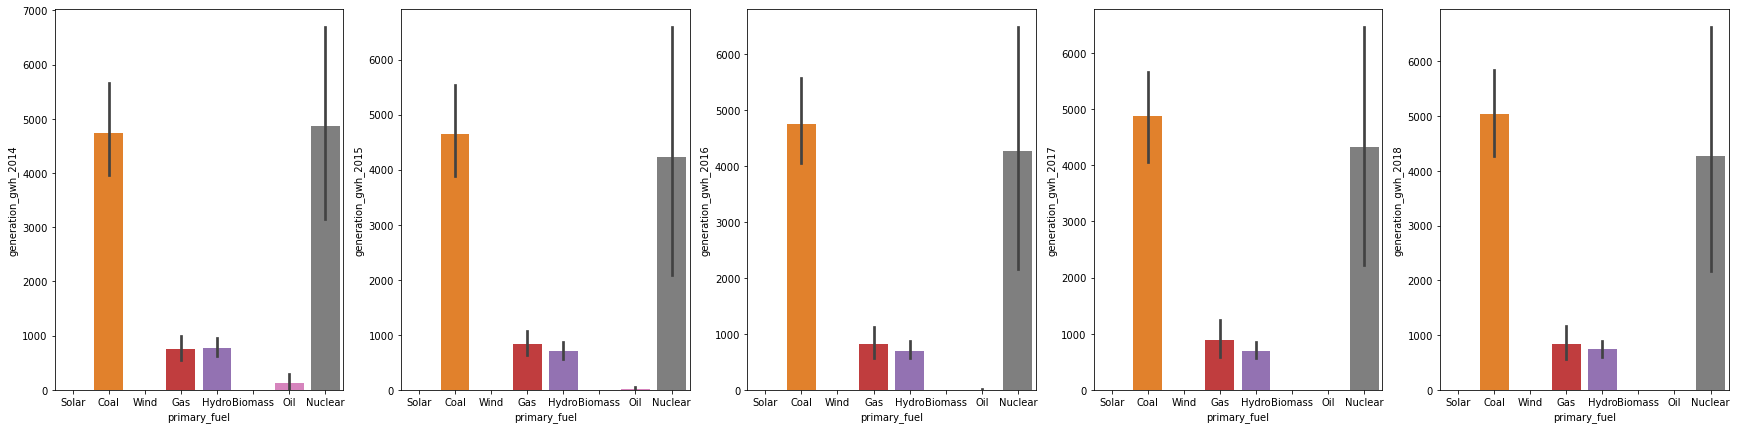

In [26]:
# let's visualize the generations
plt.figure(figsize=(30,7))
plt.subplot(1,5,1)
sns.barplot(y='generation_gwh_2014',x = 'primary_fuel',data = df)
plt.subplot(1,5,2)
sns.barplot(y='generation_gwh_2015',x = 'primary_fuel',data = df)
plt.subplot(1,5,3)
sns.barplot(y='generation_gwh_2016',x = 'primary_fuel',data = df)
plt.subplot(1,5,4)
sns.barplot(y='generation_gwh_2017',x = 'primary_fuel',data = df)
plt.subplot(1,5,5)
sns.barplot(y='generation_gwh_2018',x = 'primary_fuel',data = df)

plt.show()


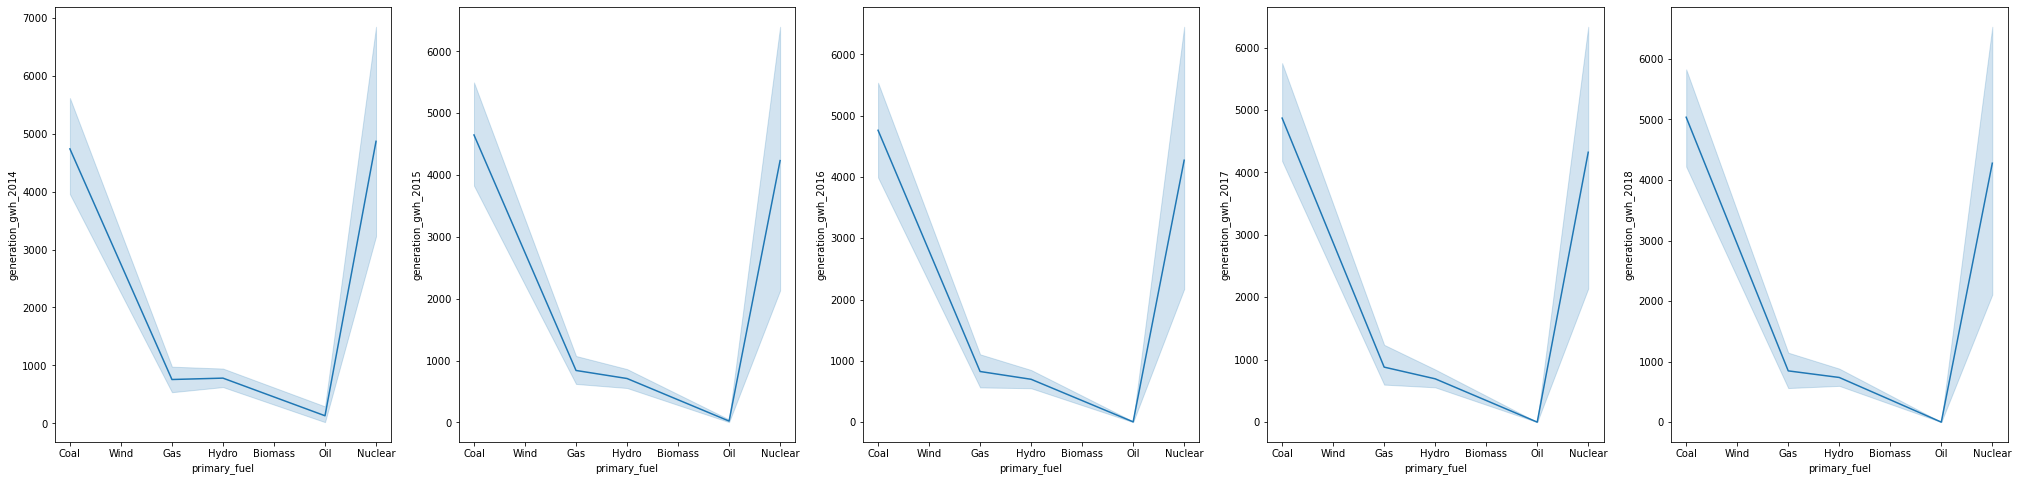

In [28]:
plt.figure(figsize=(35,8))
plt.subplot(1,5,1)
sns.lineplot(y='generation_gwh_2014',x = 'primary_fuel',data = df)
plt.subplot(1,5,2)
sns.lineplot(y='generation_gwh_2015',x = 'primary_fuel',data = df)
plt.subplot(1,5,3)
sns.lineplot(y='generation_gwh_2016',x = 'primary_fuel',data = df)
plt.subplot(1,5,4)
sns.lineplot(y='generation_gwh_2017',x = 'primary_fuel',data = df)
plt.subplot(1,5,5)
sns.lineplot(y='generation_gwh_2018',x = 'primary_fuel',data = df)
plt.show()



### All generations columns are follow same trend with target variable 'primary_fuel 

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

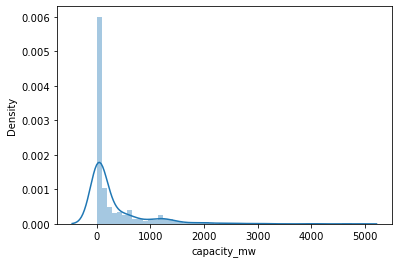

In [29]:
sns.distplot(df['capacity_mw'])

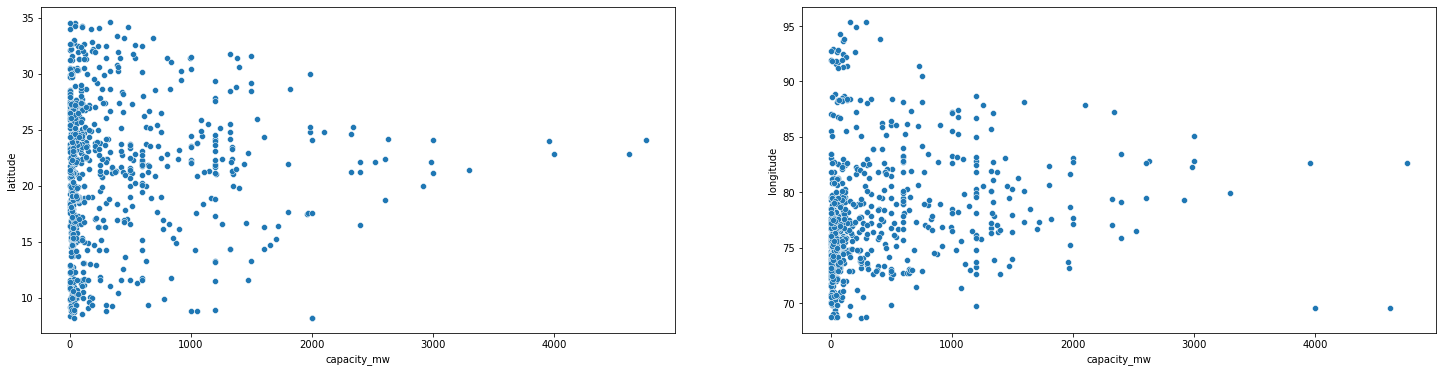

In [30]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.scatterplot(x='capacity_mw',y = 'latitude',data = df)
plt.subplot(1,2,2)
sns.scatterplot(x='capacity_mw',y = 'longitude',data = df)
plt.show()


<AxesSubplot:xlabel='capacity_mw', ylabel='geolocation_source'>

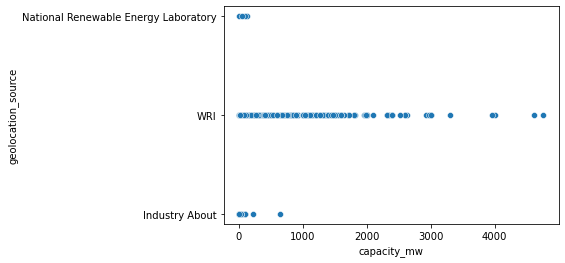

In [31]:
sns.scatterplot(x='capacity_mw',y = 'geolocation_source',data = df)


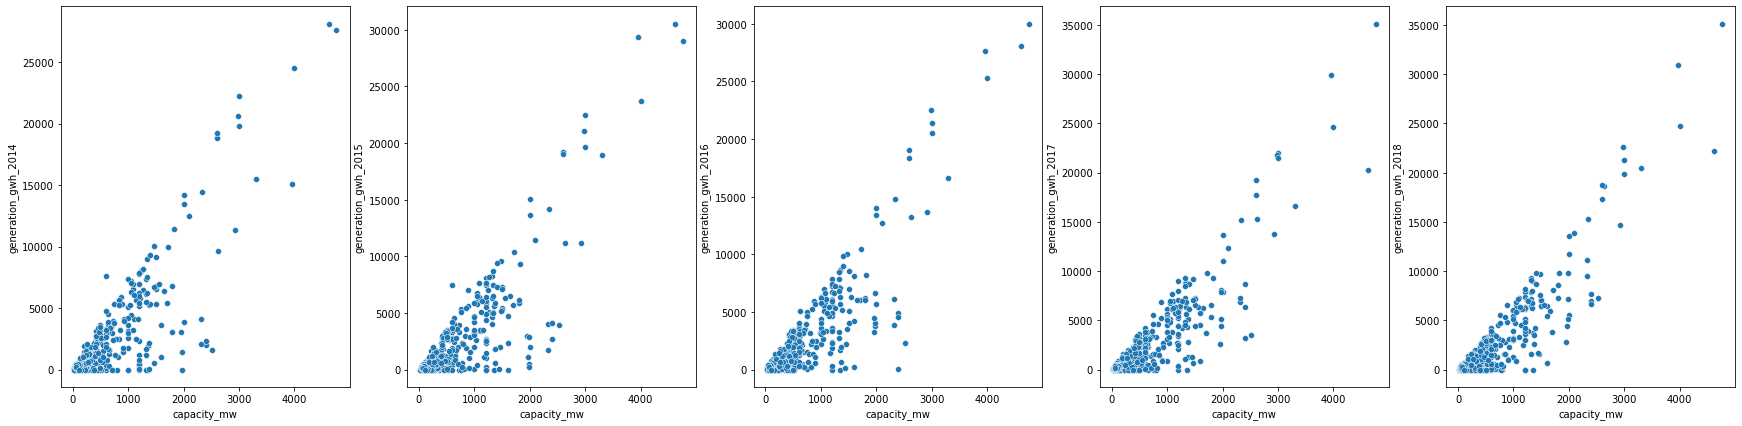

In [33]:
plt.figure(figsize=(30,7))
plt.subplot(1,5,1)
sns.scatterplot(y='generation_gwh_2014',x = 'capacity_mw',data = df)
plt.subplot(1,5,2)
sns.scatterplot(y='generation_gwh_2015',x = 'capacity_mw',data = df)
plt.subplot(1,5,3)
sns.scatterplot(y='generation_gwh_2016',x = 'capacity_mw',data = df)
plt.subplot(1,5,4)
sns.scatterplot(y='generation_gwh_2017',x = 'capacity_mw',data = df)
plt.subplot(1,5,5)
sns.scatterplot(y='generation_gwh_2018',x = 'capacity_mw',data = df)

plt.show()


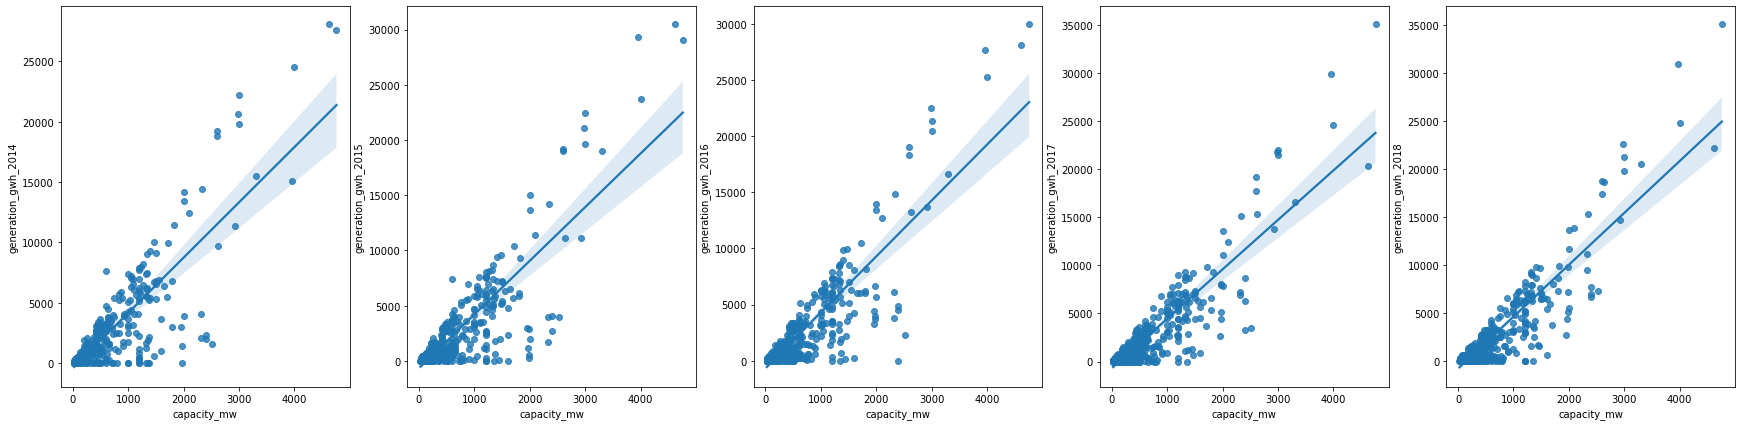

In [34]:
plt.figure(figsize=(30,7))
plt.subplot(1,5,1)
sns.regplot(y='generation_gwh_2014',x = 'capacity_mw',data = df)
plt.subplot(1,5,2)
sns.regplot(y='generation_gwh_2015',x = 'capacity_mw',data = df)
plt.subplot(1,5,3)
sns.regplot(y='generation_gwh_2016',x = 'capacity_mw',data = df)
plt.subplot(1,5,4)
sns.regplot(y='generation_gwh_2017',x = 'capacity_mw',data = df)
plt.subplot(1,5,5)
sns.regplot(y='generation_gwh_2018',x = 'capacity_mw',data = df)

plt.show()


### All generations columns are follow same trend with target variable 'capacity_mw'. there is no use of all generations columns

In [35]:
# drop the unnecessary columns from dataset
df.drop(columns=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'],inplace=True)
df.drop(columns = ['name'],inplace= True)

In [36]:
# converting text into numbers using label encoder
from sklearn.preprocessing import LabelEncoder
cat=[i for i in df.columns if df[i].dtypes=='O']
enc = LabelEncoder()
for i in cat:
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [37]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,NaN
1,98.0,24.7663,74.6090,1,NaN,174,2,NaN
2,39.2,21.9038,69.3732,7,NaN,21,2,NaN
3,135.0,23.8712,91.3602,2,2004.0,22,2,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,7279.000000


In [38]:
# let's treat with nulls
for col in df.columns:
    df[col] = df[col].fillna(df[col].mean()) 

In [39]:
df.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2018    0
dtype: int64

In [40]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,109,1,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,174,2,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,21,2,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,22,2,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,22,2,7279.000000


In [41]:
df.shape

(907, 8)

In [42]:
# stats about data
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,3.206174,1997.091082,43.847850,1.754135,2600.804099
std,590.085456,6.079148,4.812291,2.280652,13.016360,44.642818,0.700183,3030.808041
min,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1.000000,1997.091082,22.000000,2.000000,824.842340
50%,59.200000,21.281800,76.979200,3.000000,1997.091082,22.000000,2.000000,2600.804099
75%,385.250000,25.176450,79.206100,6.000000,2003.000000,29.500000,2.000000,2600.804099
max,4760.000000,34.649000,95.408000,7.000000,2018.000000,190.000000,3.000000,35136.000000


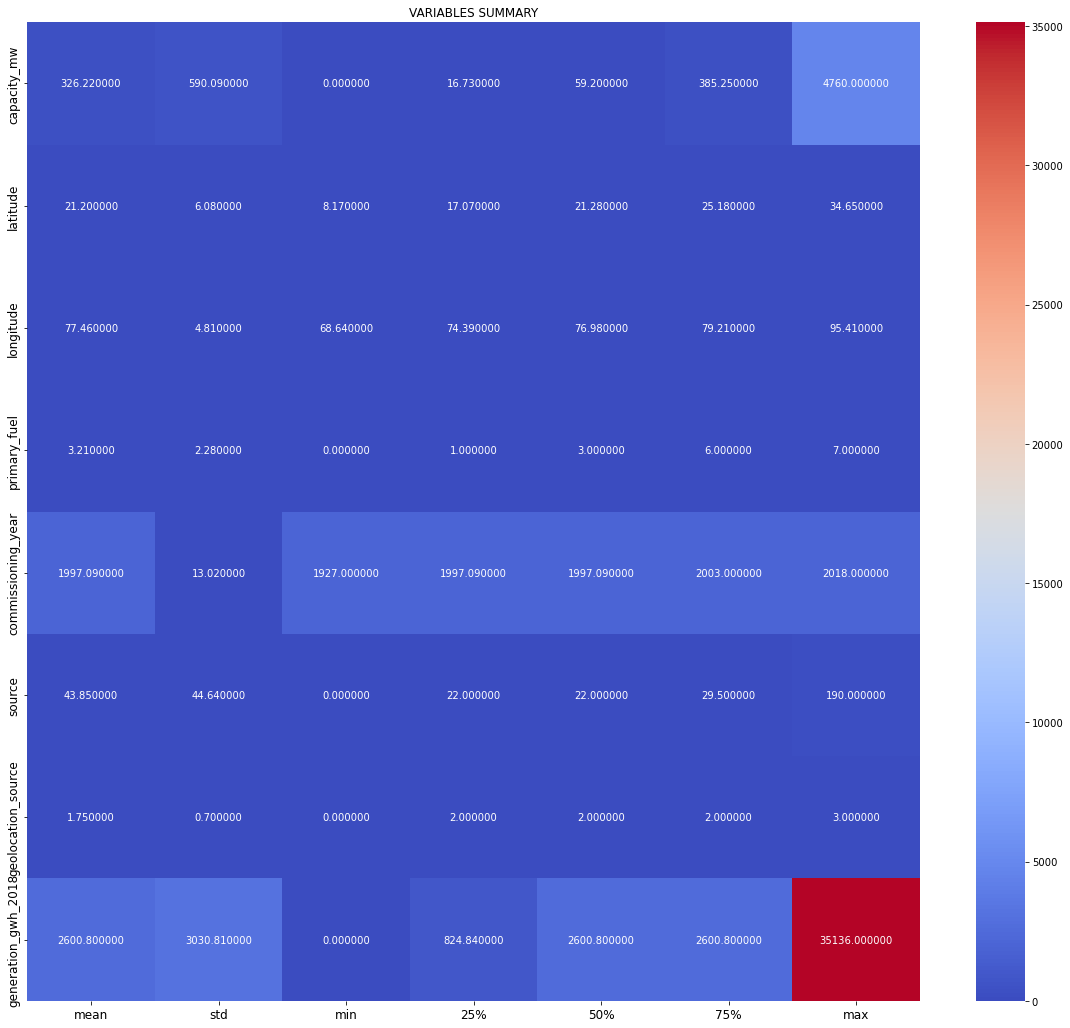

In [44]:
df.describe()
plt.figure(figsize=(20,18))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt='f',cmap='coolwarm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("VARIABLES SUMMARY")
plt.show()

## Observations:-
- In variable summery capacity_mw and longitude indicating the presence of outliers
- commissioning_year and generation_gwh_2018 is also indicating the presence of outliers.
- latitude:  Measure of central Tendency and Dispersion is looking satisfactory,Min and Max are also satisfactory.


## Normal Distribution curve for every individual column


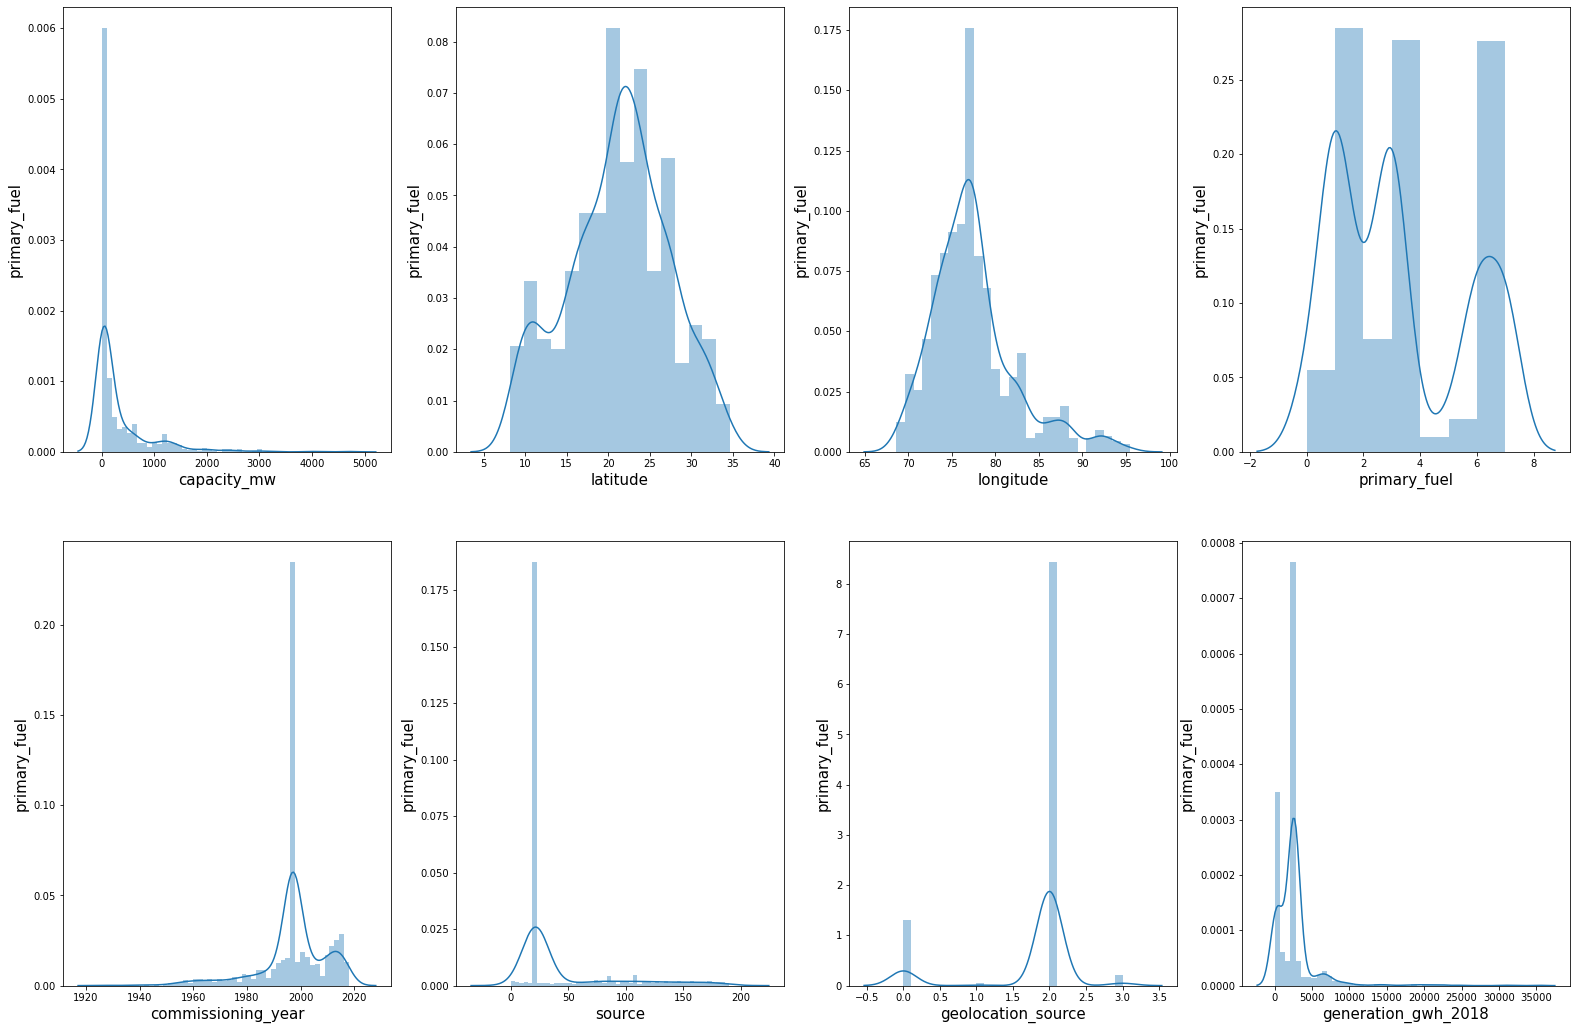

In [45]:
# let's visualize the data using distribution plot
plt.figure(figsize=(27,18))
pn = 1
for col in df:
    if pn <= 8:
        ax = plt.subplot(2,4,pn)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 15)
        plt.ylabel('primary_fuel',fontsize = 15)
    pn +=1
plt.show()    

### capacity_mw,longitude,commissioning_year and generation_gwh_2018 features are indicating the presence of outliers.


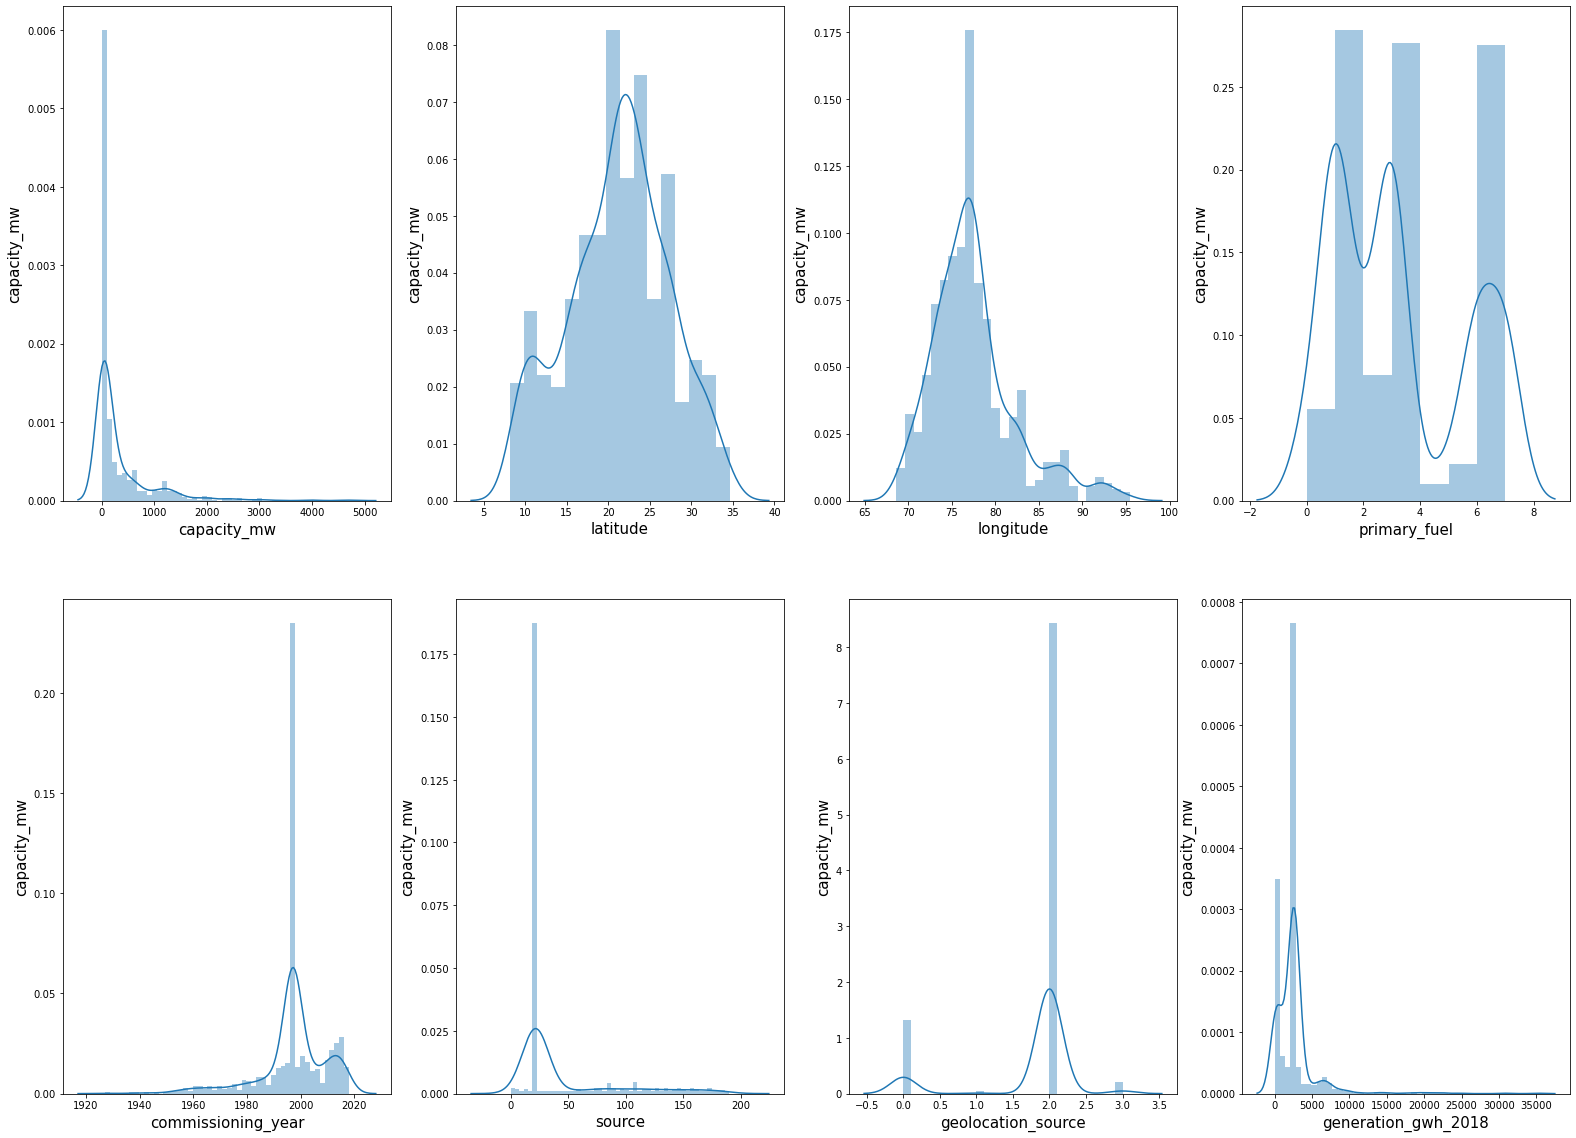

In [42]:
# let's visualize the data using distribution plot
plt.figure(figsize=(27,20))
pn = 1
for col in df:
    if pn <= 8:
        ax = plt.subplot(2,4,pn)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 15)
        plt.ylabel('capacity_mw',fontsize = 15)
    pn +=1
plt.show()    

### Checking Outliers

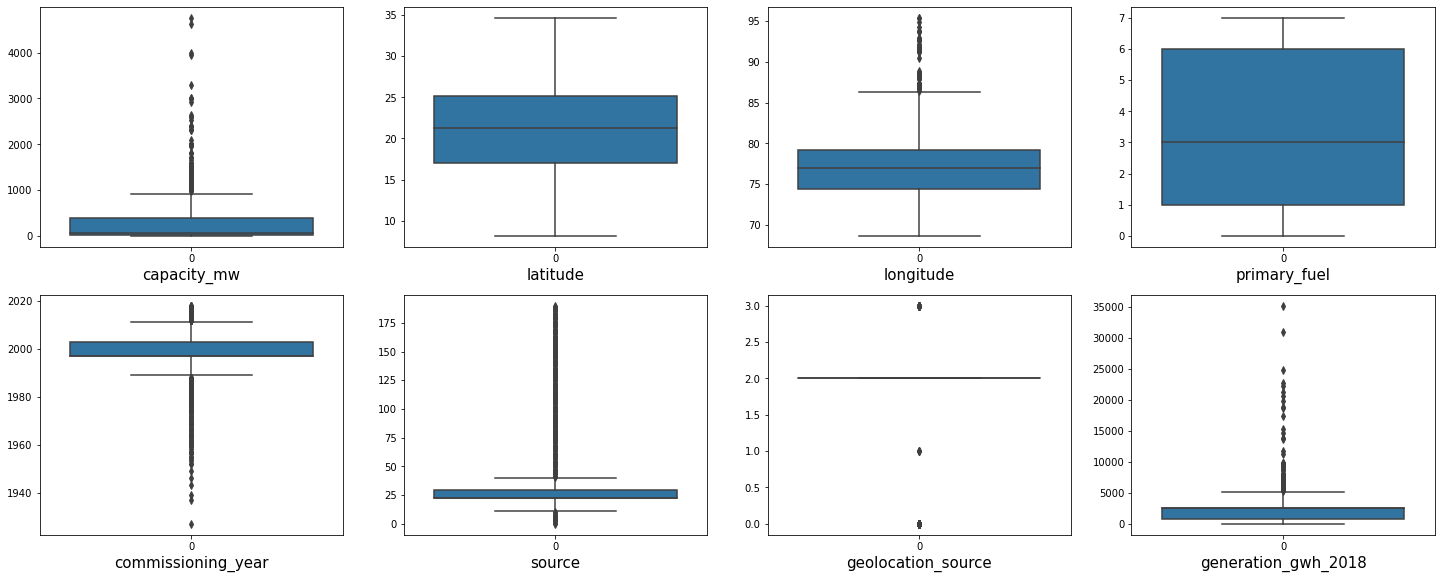

In [46]:
plt.figure(figsize=(25,15))
pn = 1
for col in df:
    if pn <= 12:
        ax = plt.subplot(3,4,pn)
        sns.boxplot(data=df[col])
        plt.xlabel(col,fontsize = 15)
    pn +=1
plt.show()    

### as per my observation, capacity_mw,longitude,commissioning_year and generation_gwh_2018 features are indicating the presence of outliers. we will remove the outliers by using zscore technique 

## Removing Outliers


In [47]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (907, 8)
Shape of the dataframe after removing outliers:  (835, 8)
Percentage of data loss post outlier removal:  7.938257993384785


## Correlation

In [48]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018
capacity_mw,1.000000,0.048429,0.261421,-0.412261,0.299199,-0.273858,0.212710,0.532051
latitude,0.048429,1.000000,-0.017231,-0.011145,0.103616,0.072134,-0.186794,0.016937
longitude,0.261421,-0.017231,1.000000,-0.390244,0.155280,-0.248801,0.269377,-0.019505
primary_fuel,-0.412261,-0.011145,-0.390244,1.000000,-0.149593,0.063886,-0.405621,-0.048677
commissioning_year,0.299199,0.103616,0.155280,-0.149593,1.000000,-0.007091,0.026618,0.187325
source,-0.273858,0.072134,-0.248801,0.063886,-0.007091,1.000000,-0.505523,0.090137
geolocation_source,0.212710,-0.186794,0.269377,-0.405621,0.026618,-0.505523,1.000000,-0.065112
generation_gwh_2018,0.532051,0.016937,-0.019505,-0.048677,0.187325,0.090137,-0.065112,1.000000


In [49]:
# let's check the correation with capacity_mw
df.corr()['capacity_mw'].sort_values


<bound method Series.sort_values of capacity_mw            1.000000
latitude               0.048429
longitude              0.261421
primary_fuel          -0.412261
commissioning_year     0.299199
source                -0.273858
geolocation_source     0.212710
generation_gwh_2018    0.532051
Name: capacity_mw, dtype: float64>

In [50]:
# let's check the correation with primary_fuel
df.corr()['primary_fuel'].sort_values


<bound method Series.sort_values of capacity_mw           -0.412261
latitude              -0.011145
longitude             -0.390244
primary_fuel           1.000000
commissioning_year    -0.149593
source                 0.063886
geolocation_source    -0.405621
generation_gwh_2018   -0.048677
Name: primary_fuel, dtype: float64>

### Checking correlation with primary_fuel

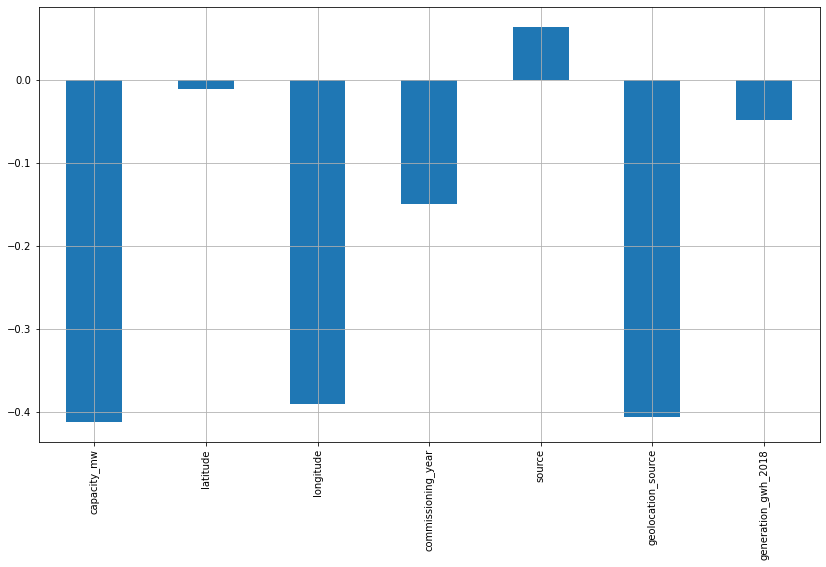

In [51]:
df.drop('primary_fuel',axis=1).corrwith(df.primary_fuel).plot(kind='bar',grid=True,figsize=(14,8))
plt.show()

### Checking correlation with capacity_mw

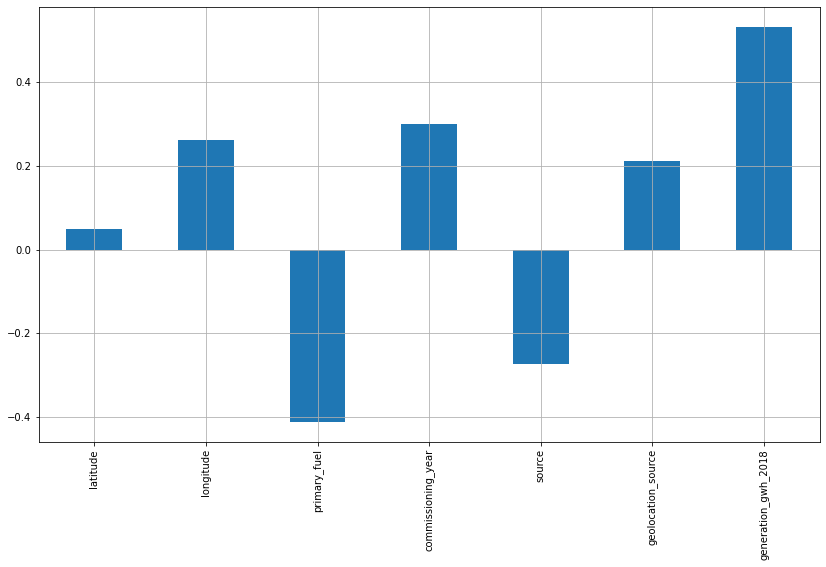

In [53]:
df.drop('capacity_mw',axis=1).corrwith(df.capacity_mw).plot(kind='bar',grid=True,figsize=(14,8))
plt.show()

<AxesSubplot:>

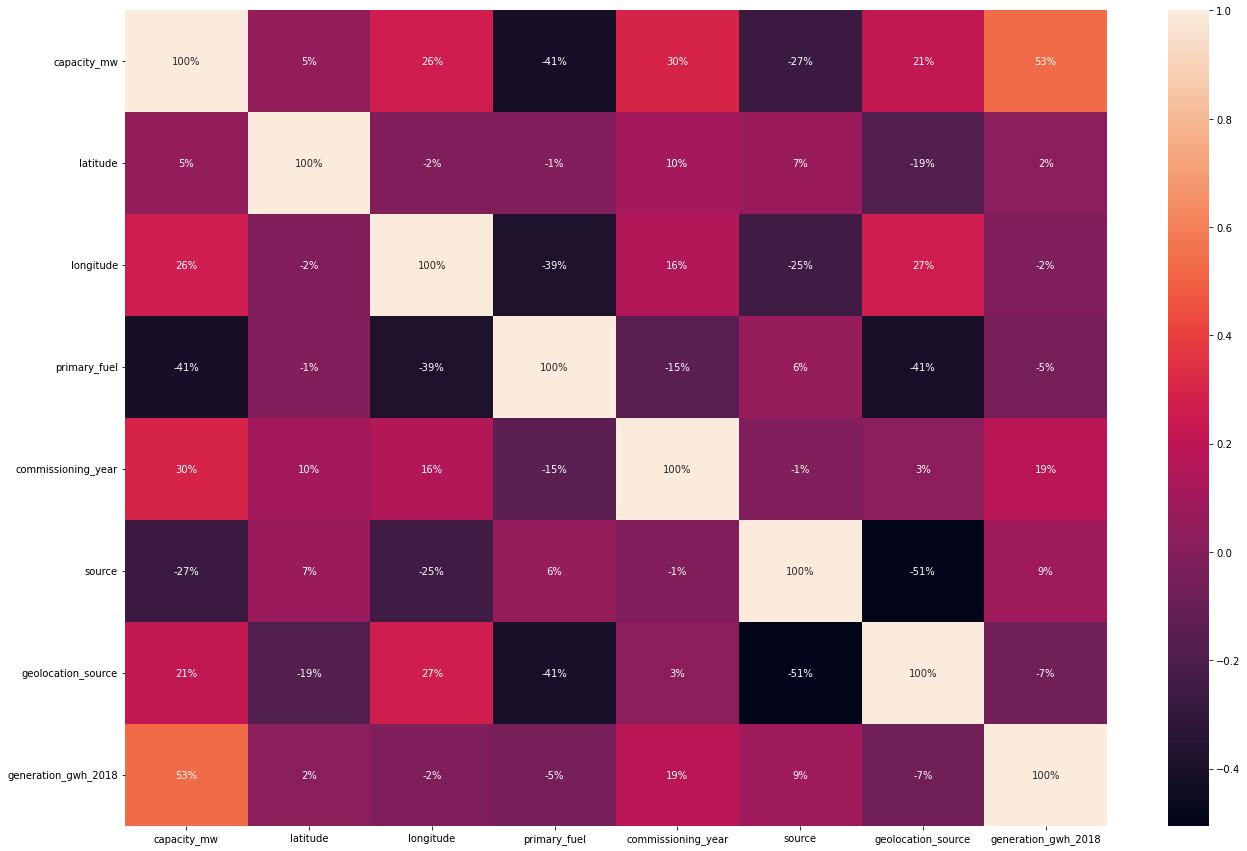

In [54]:
# let's check correlation using heatmap
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(),annot =True,fmt  = '.0%')

## Obserrvations:-
- primary_fuel and source are negatively correlated with target.
- latitude,longitude,commissioning_year,geolocation_source and generation_gwh_2018 are positively correlated with target variable
- There is no multicollinearity problem exist in  this dataset. 
- maximum correlation : generation_gwh_2018
- minimum correlation : latitude                              
                                  

### Skewness

In [55]:
df.skew()

capacity_mw            1.951725
latitude              -0.113160
longitude              0.911191
primary_fuel           0.414053
commissioning_year    -0.843485
source                 1.786502
geolocation_source    -1.858278
generation_gwh_2018    1.358324
dtype: float64

## Dividing data in features and label

In [56]:
x = df.drop('capacity_mw',axis = 1)
x.head()

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018
0,28.1839,73.2407,6,2011.000000,109,1,2600.804099
1,24.7663,74.6090,1,1997.091082,174,2,2600.804099
2,21.9038,69.3732,7,1997.091082,21,2,2600.804099
3,23.8712,91.3602,2,2004.000000,22,2,626.239128
4,21.9603,82.4091,1,2015.000000,22,2,7279.000000


In [57]:
y=df['capacity_mw']

### Removal of skewness using Power Transformer as values are negative we are using 'yeo-johnson' method for removing skewness

In [58]:
from sklearn.preprocessing import PowerTransformer
p_transform = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_transform.fit_transform(x), columns=x.columns)
x.head(10)

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018
0,1.158741,-0.930456,1.131526,1.279713,1.615940,-1.508604,0.377618
1,0.591912,-0.513824,-1.018773,-0.184895,2.090140,0.248009,0.377618
2,0.120911,-2.354133,1.405264,-0.184895,-0.468138,0.248009,0.377618
3,0.444242,2.446285,-0.398599,0.493260,-0.399913,0.248009,-0.905002
4,0.130172,1.248396,-1.018773,1.779350,-0.399913,0.248009,2.078748
5,0.427387,-2.670552,-1.018773,0.599181,-0.399913,0.248009,-0.598098
6,-1.718311,0.128060,0.083236,-2.113157,-0.399913,0.248009,-1.790587
7,1.834733,0.176815,0.083236,1.160727,-0.399913,0.248009,-0.952062
8,-0.784685,-0.158998,0.083236,0.493260,-0.399913,0.248009,-1.144443
9,0.327850,1.111174,-1.018773,0.929558,-0.399913,0.248009,-0.236693


In [59]:
pd.DataFrame(x).skew().sort_values()

generation_gwh_2018   -0.348291
source                -0.179941
latitude              -0.071645
primary_fuel          -0.056992
geolocation_source    -0.041528
longitude             -0.000626
commissioning_year     0.027737
dtype: float64

### Every value will be reduced after transformation

In [60]:
# data scaling formula z = (x-mean)/std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[ 1.1587411 , -0.93045563,  1.13152643, ...,  1.61593961,
        -1.50860403,  0.37761836],
       [ 0.59191161, -0.51382425, -1.01877274, ...,  2.09014028,
         0.24800947,  0.37761836],
       [ 0.12091107, -2.35413304,  1.40526407, ..., -0.46813798,
         0.24800947,  0.37761836],
       ...,
       [-0.95398613, -0.24097557,  1.40526407, ..., -0.46813798,
         0.24800947,  0.37761836],
       [ 0.52318985, -0.77140943, -1.01877274, ...,  0.91776733,
         0.24800947,  0.37761836],
       [-1.79967334,  0.24182207,  1.40526407, ..., -0.46813798,
         0.24800947,  0.37761836]])

## Final features Multi-Collinearity Check using VIF**


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,latitude,1.044446
1,longitude,1.284221
2,primary_fuel,1.283297
3,commissioning_year,1.095669
4,source,1.192602
5,geolocation_source,1.271348
6,generation_gwh_2018,1.045586


### There is no sign of Multi-collinearity

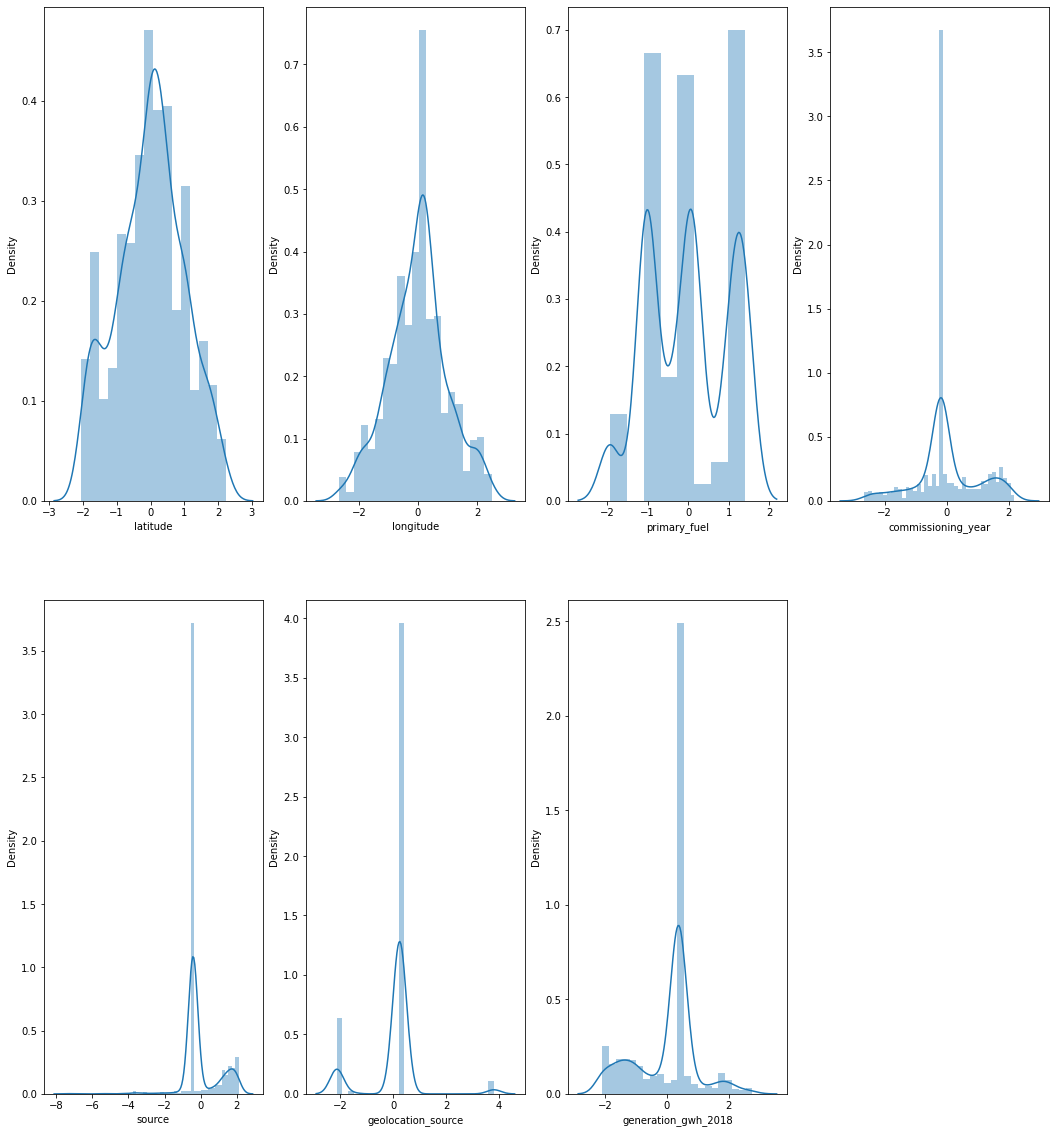

In [62]:
# let's visualize the data after correcting skewness
plt.figure(figsize=(18,20))
plotnumber=1
for column in x:
    if plotnumber<=8:
        plt.subplot(2,4,plotnumber)
        ax=sns.distplot(x[column])
        
    plotnumber+=1
    
plt.show()    

### Skewness has been corrected and data is distributed normally. Now ,our model is ready for model building


# Model selection/predictions


## Regression because our Target variable 'capacity_mw' is continuous.


### Finding the best Random state and maximum accuracy

In [71]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [90]:
maxAccu=0
maxRS=0

for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    knn=KNeighborsRegressor()
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.826163664449199 on Random State 5


**Splitting the data into Training and Testing**

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=363)

**I am defining a function for splitting of the Training and Testing features alongwith Target, then it trains the model soon after training it predicts the Target and calculates RMSE score with R2 score alongwith this it calculates the Cross Validation score and finally it finds the difference between the R2 score and Cross Validation score.**

In [86]:
# Regression Model Function

def reg(model, x, y):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=5)
    
    #Training the model
    model.fit(X_train, Y_train)
    
    #Predicting Y_test
    pred = model.predict(X_test)
    
    #RMSE
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    #R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    #CV Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    #Difference
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

## Linear Regression

In [75]:
#Linear regression
model=LinearRegression()
reg(model, x, y)

RMSE Score is: 310.5166288292961
R2 Score is: 53.80543471770719
Cross Validation Score: 39.91057138834559
R2 Score - Cross Validation Score is 13.894863329361606


**Ridge Regression**

In [76]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, x, y)

RMSE Score is: 311.1640876101631
R2 Score is: 53.612593137736056
Cross Validation Score: 39.9530701491477
R2 Score - Cross Validation Score is 13.659522988588357


## Decision Tree Regressor

In [77]:
# Decision Tree Regressor
model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, x, y)

RMSE Score is: 266.87291546277964
R2 Score is: 65.87833933400563
Cross Validation Score: 45.85890950305528
R2 Score - Cross Validation Score is 20.01942983095035


## Random Forest Regressor

In [83]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, x, y)

RMSE Score is: 262.3475136218923
R2 Score is: 67.02573950214882
Cross Validation Score: 62.39970694155181
R2 Score - Cross Validation Score is 4.626032560597011


## KNeighbors Regressor

In [87]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model,x,y)

RMSE Score is: 239.78212641272626
R2 Score is: 63.98506495348912
Cross Validation Score: 60.61677843133012
R2 Score - Cross Validation Score is 3.3682865221590035


## Support Vector Regression

In [91]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, x, y)

RMSE Score is: 428.8968905048053
R2 Score is: -15.227149024863639
Cross Validation Score: -15.529946472669032
R2 Score - Cross Validation Score is 0.30279744780539275


### According to scores  K Neighbors Regressoris best fitted model

# Hyperparameter Tuning of Final model

In [92]:
params= {'algorithm':['ball_tree', 'kd_tree', 'brute'],
                      'leaf_size':[20,30,40,50],
                      'n_neighbors':[3,5,7,9,11,13]}

In [93]:
grid_knn = GridSearchCV(estimator=knn,param_grid=params)

In [95]:
grid_knn.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40, 50],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [96]:
grid_knn.best_params_

{'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 7}

In [97]:
knn = KNeighborsRegressor(algorithm='ball_tree',leaf_size=20,n_neighbors=7)

In [98]:
knn.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=20, n_neighbors=7)

In [99]:
y_pred = knn.predict(X_test)

In [101]:
print("Score Post Hyperparameter Tuning is======",r2_score(Y_test,y_pred))

Score Post Hyperparameter Tuning is====== 0.6979821570866097


# save the final model


In [102]:
import joblib
joblib.dump(knn,'Global Power Plant.pkl')

['Global Power Plant.pkl']

# Model selection/predictions


## Classification because our Target variable 'primary_fuel' is categorical.

In [54]:
### Dividing data in features and label
x1 = df.drop('primary_fuel',axis = 1)
x1.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.000000,109,1,2600.804099
1,98.0,24.7663,74.6090,1997.091082,174,2,2600.804099
2,39.2,21.9038,69.3732,1997.091082,21,2,2600.804099
3,135.0,23.8712,91.3602,2004.000000,22,2,626.239128
4,1800.0,21.9603,82.4091,2015.000000,22,2,7279.000000


In [55]:
y1=df['primary_fuel']

## Best Random State


In [56]:
# lets import all necessary libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,accuracy_score

In [62]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(x1, y1, test_size=0.20, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(X_train, Y_train)
    pred = rf.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 0.9161676646706587 on Random State 98


In [109]:
# create empty lits
accur_score=[]
c_v_score=[]
diff=[]

In [57]:
# classification model Function
def classify(model,x1,y1):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size= 0.20,random_state = 313)
    # training the model
    model.fit(x_train,y_train)
    
    # predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy score
    acc_score=(accuracy_score(y_test,pred))*100
    accur_score.append(acc_score)
    print('Accuracy score',acc_score)
    
    # Classification report
    class_report=classification_report(y_test,pred)
    print('\nClassification Report:\n',class_report)
    
    # Cross validation score
    cv_score=(cross_val_score(model,x1,y1,cv=15).mean())*100
    c_v_score.append(cv_score)
    print('Cross validation score',cv_score)
    
    # result of accuracy score minus cv_score
    result = acc_score-cv_score
    diff.append(result)
    print('\n Accuracy score - cross val score is:',result)


## KNN

In [112]:
model = KNeighborsClassifier()
classify(model,x1,y1)

Accuracy score 79.64071856287424

Classification Reort:
               precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.78      0.76      0.77        50
           2       0.50      0.40      0.44         5
           3       0.83      0.78      0.80        50
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.96      0.88      0.92        25
           7       0.83      1.00      0.91        24

    accuracy                           0.80       167
   macro avg       0.56      0.58      0.56       167
weighted avg       0.79      0.80      0.79       167

Cross validation score 70.28787878787878

 Accuracy score - cross val score is: 9.35283977499546


### After setting the random state = 114 , We got the accuracy score is 79%


## Random Forest

In [119]:
model =RandomForestClassifier()
classify(model,x1,y1)

Accuracy score 91.01796407185628

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.85      0.93      0.89        42
           2       0.73      0.85      0.79        13
           3       0.95      0.95      0.95        41
           4       0.00      0.00      0.00         1
           5       0.50      0.20      0.29         5
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        27

    accuracy                           0.91       167
   macro avg       0.74      0.70      0.71       167
weighted avg       0.90      0.91      0.90       167

Cross validation score 86.45887445887446

 Accuracy score - cross val score is: 4.559089612981822


### After setting the random state = 313 , We got the accuracy score is 91%


## AdaBoost

In [122]:
model=AdaBoostClassifier()
classify(model,x1,y1)

Accuracy score 51.49700598802395

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.09      0.05      0.06        44
           2       0.00      0.00      0.00        10
           3       0.41      1.00      0.59        43
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00        40
           7       1.00      0.05      0.09        21

    accuracy                           0.51       167
   macro avg       0.31      0.26      0.22       167
weighted avg       0.50      0.51      0.42       167

Cross validation score 43.6017316017316

 Accuracy score - cross val score is: 7.89527438629235


### After setting the random state = 262 , We got the accuracy score is 51%


## Decision tree

In [125]:
model=DecisionTreeClassifier()
classify(model,x1,y1)

Accuracy score 88.02395209580838

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.77      0.81      0.79        42
           2       0.73      0.62      0.67        13
           3       0.93      0.95      0.94        55
           4       0.00      0.00      0.00         0
           5       0.33      0.33      0.33         3
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        28

    accuracy                           0.88       167
   macro avg       0.72      0.66      0.68       167
weighted avg       0.89      0.88      0.88       167

Cross validation score 82.3809523809524

 Accuracy score - cross val score is: 5.642999714855989


### After setting the random state = 399, We got the accuracy score is 88%


## Compare the models


In [127]:
# create a list of labels of build models
label = ['KNN','Random Forest','AdaBoost','Decision Tree']
print(label)
print(accur_score)
print(c_v_score)
print(diff)


['KNN', 'Random Forest', 'AdaBoost', 'Decision Tree']
[79.64071856287424, 91.01796407185628, 51.49700598802395, 88.02395209580838]
[70.28787878787878, 86.45887445887446, 43.6017316017316, 82.3809523809524]
[9.35283977499546, 4.559089612981822, 7.89527438629235, 5.642999714855989]


In [128]:
# create dataframe
score_df = pd.DataFrame({'Model name':label,'Accuracy Score':accur_score,'Cross validation Score':c_v_score,'Difference':diff})
score_df

,Model name,Accuracy Score,Cross validation Score,Difference
0,KNN,79.640719,70.287879,9.352840
1,Random Forest,91.017964,86.458874,4.559090
2,AdaBoost,51.497006,43.601732,7.895274
3,Decision Tree,88.023952,82.380952,5.643000


 ###  as per my observation , I choose RandomForest as the best model and model accuracy and cross val score difference  is also least.


## HYPERPARAMETER TUNING OF FINAL MODEL


In [63]:
rf = RandomForestClassifier()

In [64]:
params = {
    'n_estimators':[100],
    'n_jobs':[50,60],
    'max_depth':[15,19],
    'criterion':['entropy','gini'],
    'random_state':[30,40,50],
    'min_samples_leaf':[2,4,3]       }

In [65]:
grd = GridSearchCV(rf,param_grid = params)
grd.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [15, 19], 'min_samples_leaf': [2, 4, 3],
                         'n_estimators': [100], 'n_jobs': [50, 60],
                         'random_state': [30, 40, 50]})

In [68]:
rf = grd.best_estimator_
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=19, min_samples_leaf=2, n_jobs=50,
                       random_state=50)

In [69]:
pred = rf.predict(X_test)
accuracy_score(Y_test,pred)

0.8802395209580839

## Confusion Matrix of Random Forest

In [71]:
confusion_matrix(Y_test,pred)

array([[ 4,  3,  0,  0,  0,  0,  0,  0],
       [ 1, 32,  3,  3,  0,  0,  0,  0],
       [ 0,  1, 11,  4,  0,  1,  0,  0],
       [ 0,  1,  0, 47,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30]], dtype=int64)

# Save the final model


In [70]:
import joblib
joblib.dump(rf,'Global Power Plant.pkl')

['Global Power Plant.pkl']